In [57]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [58]:
df = pd.read_csv('water_potability.csv',encoding='iso-8859-1')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.8904555,20791.31898,7.300211873,368.516441,564.3086542,10.37978308,86.99097046,2.963135381,0
1,3.716080075,129.4229205,18630.05786,6.635245884,NaN,592.8853591,15.18001312,56.32907628,4.500656275,0
2,8.099124189,224.2362594,19909.54173,9.275883603,NaN,418.6062131,16.86863693,66.42009251,3.05593375,0
3,8.316765884,214.3733941,22018.41744,8.059332377,356.886136,363.2665162,18.4365245,100.3416744,4.628770537,0
4,9.092223456,181.1015092,17978.98634,6.546599974,310.135738,398.4108134,11.55827944,31.99799273,4.075075425,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668101687,193.6817355,47580.9916,7.166638935,359.948574,526.4241709,13.89441852,66.68769479,4.43582091,1
3272,7.808856018,193.5532116,17329.80216,8.061361988,NaN,392.4495796,19.90322518,NaN,2.798242842,1
3273,9.419510316,175.7626463,33155.57822,7.350233233,NaN,432.044783,11.03906969,69.84540029,3.298875499,1
3274,5.126762923,230.6037575,11983.86938,6.303356534,NaN,402.8831131,11.16894622,77.4882131,4.708658468,1


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   object 
 1   Hardness         3276 non-null   object 
 2   Solids           3276 non-null   object 
 3   Chloramines      3276 non-null   object 
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   object 
 6   Organic_carbon   3276 non-null   object 
 7   Trihalomethanes  3114 non-null   object 
 8   Turbidity        3276 non-null   object 
 9   Potability       3276 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 256.1+ KB


In [60]:
df.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ph,2785,2785,3.716080075,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hardness,3276,3276,204.8904555,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Solids,3276,3276,20791.31898,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chloramines,3276,3276,7.300211873,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sulfate,2495.0,NaN,NaN,NaN,333.775777,41.41684,129.0,307.699498,333.073546,359.95017,481.030642
Conductivity,3276,3276,564.3086542,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Organic_carbon,3276,3276,10.37978308,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Trihalomethanes,3114,3114,86.99097046,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Turbidity,3276,3276,2.963135381,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Potability,3276.0,NaN,NaN,NaN,0.103175,0.304233,0.0,0.0,0.0,0.0,1.0


In [61]:
def get_non_numeric(series):
  non_numeric_elements = []
  for elem in series:
    try:
      float(elem)
    except:
      non_numeric_elements.append(elem)
  return(non_numeric_elements)

In [62]:
column= df.columns
column
for col in column:
    non_numeric_elems = get_non_numeric(df[col])
    print('*********************************')
    print('Column :', col)
    print('Non numeric elements :', non_numeric_elems)


*********************************
Column : ph
Non numeric elements : ['7.-.160467231']
*********************************
Column : Hardness
Non numeric elements : ['214.496610%457156', "20''9.609618"]
*********************************
Column : Solids
Non numeric elements : ['18767.656--18134', '172.>66.59342', '2(9368.6741)8', ' ? 29,477.76 ', ' ? 24,967.32 ', ' ? 26,631.21 ', ' ? 24,539.71 ', ' ? 20,864.34 ', ' ? 16,879.52 ', ' ? 16,488.02 ', ' ? 11,351.86 ']
*********************************
Column : Chloramines
Non numeric elements : ['2.39798!499', '2.10269!09!91']
*********************************
Column : Sulfate
Non numeric elements : []
*********************************
Column : Conductivity
Non numeric elements : ['52,,,3.6712975', '323.794---624']
*********************************
Column : Organic_carbon
Non numeric elements : [' ¥12.38 ', ' ¥11.12 ', ' ¥14.93 ', ' ¥13.35 ', ' ¥11.35 ', ' ¥16.05 ', ' ¥17.29 ', ' ¥9.80 ', ' ¥9.00 ', ' ¥14.08 ', ' ¥18.70 ', ' ¥15.77 ', ' ¥13.93 

In [63]:
df['Organic_carbon'] = df['Organic_carbon'].str.replace('¥', '')
for col in column:
    non_numeric_elems = get_non_numeric(df[col])
    print('*********************************')
    print('Column :', col)
    print('Non numeric elements :', non_numeric_elems)
    df[col]=pd.to_numeric(df[col], errors='coerce')

*********************************
Column : ph
Non numeric elements : ['7.-.160467231']
*********************************
Column : Hardness
Non numeric elements : ['214.496610%457156', "20''9.609618"]
*********************************
Column : Solids
Non numeric elements : ['18767.656--18134', '172.>66.59342', '2(9368.6741)8', ' ? 29,477.76 ', ' ? 24,967.32 ', ' ? 26,631.21 ', ' ? 24,539.71 ', ' ? 20,864.34 ', ' ? 16,879.52 ', ' ? 16,488.02 ', ' ? 11,351.86 ']
*********************************
Column : Chloramines
Non numeric elements : ['2.39798!499', '2.10269!09!91']
*********************************
Column : Sulfate
Non numeric elements : []
*********************************
Column : Conductivity
Non numeric elements : ['52,,,3.6712975', '323.794---624']
*********************************
Column : Organic_carbon
Non numeric elements : []
*********************************
Column : Trihalomethanes
Non numeric elements : ['70.1906$£"2482']
*********************************
Column : Turbi

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2784 non-null   float64
 1   Hardness         3274 non-null   float64
 2   Solids           3265 non-null   float64
 3   Chloramines      3274 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3274 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3113 non-null   float64
 8   Turbidity        3274 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [65]:
for col in column:
    df.loc[df[col].isna(),col]= df[col].mean()

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   float64
dtypes: float64(10)
memory usage: 256.1 KB


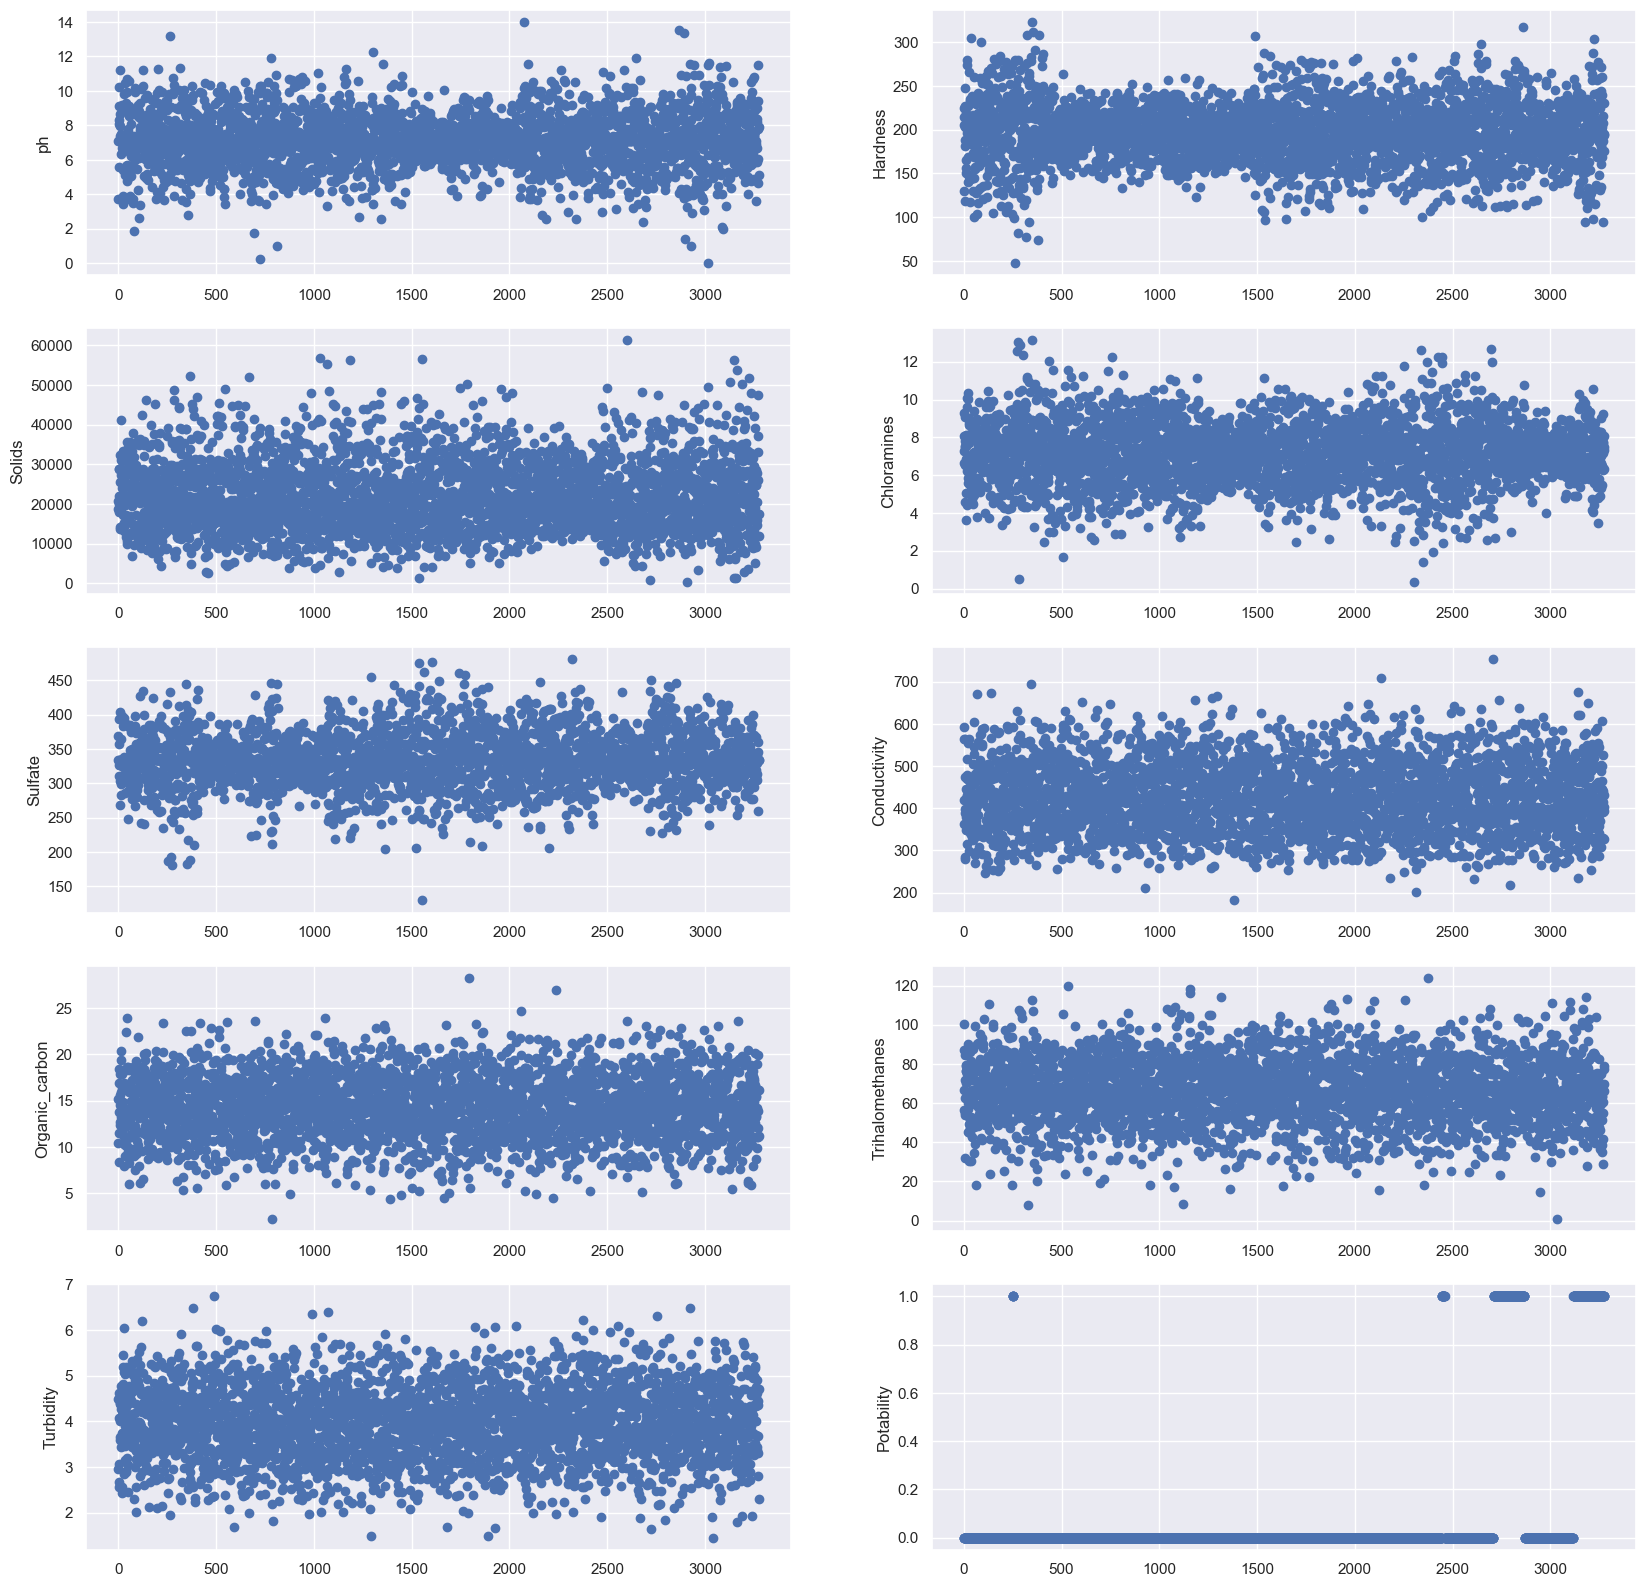

In [73]:
numeric_cols = df.select_dtypes(include=np.number)
column_names = list(numeric_cols.columns)
col_index= 0
plot_rows= 5
plot_cols= 2
fig, ax= plt.subplots(nrows= plot_rows, ncols= plot_cols, figsize = (20,20))
for row_count in range(plot_rows):
    for col_count in range(plot_cols):
        ax[row_count][col_count].scatter(y= numeric_cols[column_names[col_index]], x= numeric_cols.index)
        ax[row_count][col_count].set_ylabel(column_names[col_index])
        col_index= col_index + 1

In [72]:
df.loc[df['Chloramines']>=200, 'Chloramines' ] = df['Chloramines'].median()
df.loc[df['Chloramines']<0, 'Chloramines' ] = df['Chloramines'].median()
df.loc[df['Organic_carbon']>=2000, 'Organic_carbon' ] = df['Organic_carbon'].median()
